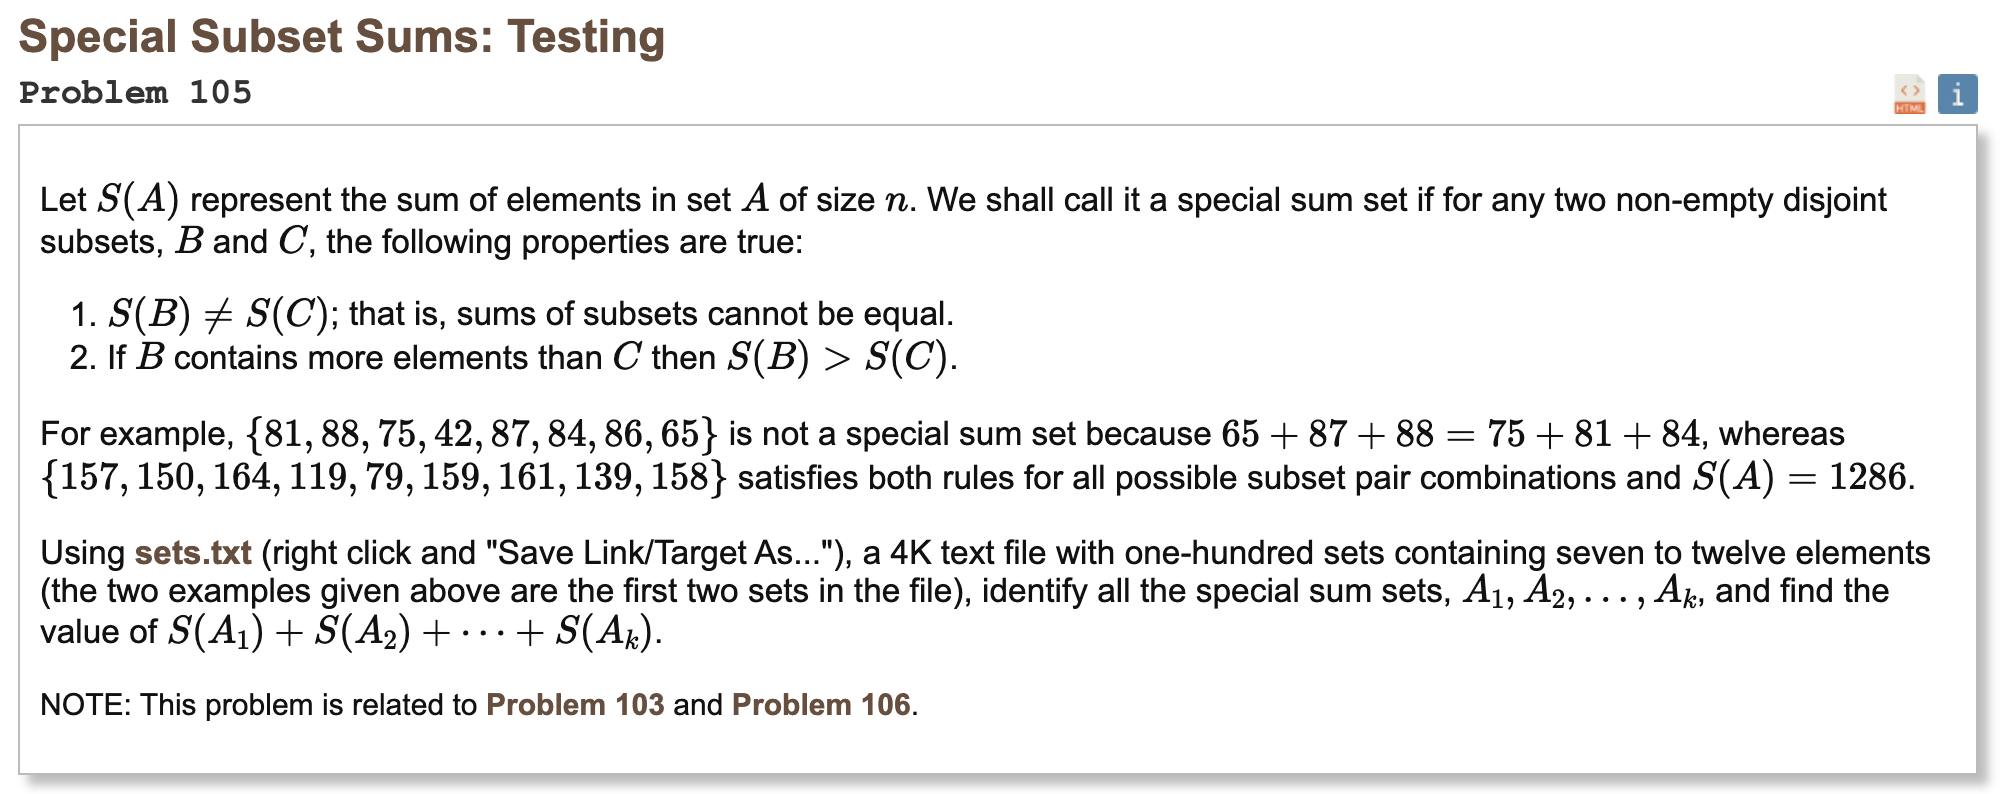

* read each set from file
* check second rule to discard impossible sets
* check first rule by searching for disjoint subsets with equal sums
* sum elements of sets that passes first and second rules
* print total

* define a function to check if the sum of the set smallest k+1 elements is greater than the sum of the largest k elements

In [1]:
from itertools import combinations

def quick_rule_two(s):
    s = sorted(s)
    n = len(s)
    for k in range(1, n // 2 + 1):
        if sum(s[:k+1]) <= sum(s[-k:]):
            return False
    return True

* define a function to check that no two disjoint subsets of the set have same sum

In [2]:
def rule_one_disjoint_unique(s):
    n = len(s)
    idx = list(range(n))
    sums_by_size = {}
    for r in range(1, n + 1):
        sums_by_size[r] = {}
        for comb in combinations(idx, r):
            total = sum(s[i] for i in comb)
            if total not in sums_by_size[r]:
                sums_by_size[r][total] = [set(comb)]
            else:
                for prev in sums_by_size[r][total]:
                    if prev.isdisjoint(comb):
                        return False
                sums_by_size[r][total].append(set(comb))
    return True

* define a function that returns True if the set has all unique elements and passes both rules

In [3]:
def is_special_sum_set(s):
    if len(s) != len(set(s)):
        return False
    if not quick_rule_two(s):
        return False
    return rule_one_disjoint_unique(s)

In [4]:
%%time

with open("0105_sets.txt") as f:
    sets_list = [list(map(int, line.strip().split(","))) for line in f if line.strip()]

total_sum = sum(sum(s) for s in sets_list if is_special_sum_set(s))

print("Result:", total_sum)

Result: 73702
CPU times: user 41 ms, sys: 1.82 ms, total: 42.8 ms
Wall time: 42.1 ms
